# Ford GoBike System Data Exploration

## Preliminary Wrangling

This document explores a dataset containing duration_sec and attributes for approximately 519700 bike trip starting from 28th of July 2017 until the end of 2017.

In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
from math import sin, cos, sqrt, atan2, radians, acos
from IPython.display import Image
from datetime import date
import calendar

%matplotlib inline

In [10]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [11]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
df.head(10)

(519700, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,NaN,NaN
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female
7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,NaN,NaN
8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,NaN,NaN
9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,NaN,NaN


In [12]:
#since start_date and end_time are object type, I'll convert them to Datetime type before continue gathering some statistics
print('start_time type before convert:-', df.start_time.dtypes)
df['start_time'] = pd.to_datetime(df['start_time'])
print('start_time type after convert:-', df.start_time.dtypes)
print('')
print('end_time type before convert:-', df.end_time.dtypes)
df['end_time'] = pd.to_datetime(df['end_time'])
print('end_time type after convert:-', df.end_time.dtypes)

start_time type before convert:- object
start_time type after convert:- datetime64[ns]

end_time type before convert:- object
end_time type after convert:- datetime64[ns]


In [13]:
# Some statistics about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: datetime64[ns](2), float64(5), int64(4), object(4)
memory usage: 59.5+ MB
None
        duration_sec  start_station

In [14]:
# check if there is a duplicated row
df.duplicated().sum()

0

There is no trip number or any information about members other than member_gender and member_birth_year. 
And for the member_birth_year, I think it's better to add the age to make comparison easier.
Also, As we can see in the below image from Ford GoBike System website [[3]](https://www.lyft.com/bikes/bay-wheels/system-data), Subscriber mean Members, and Customer means Casual. Thus, I'll change member_birth_year and member_gender to subscriber_birth_year and subscriber_gender, respectivly.

In [15]:
#first, I'll create a copy from the dataframe to manipulate.
bike = df

![title](https://previews.dropbox.com/p/thumb/AAfGTns5gVGxWuSrfr2FrCmVtsnskG_8ZiSyhcWxeMzMr9thE1Vplk8vu3e1ZmVLiVNIMBWH9z2DzIoDjs7vmxR3bc1dQG9BZmezUVLleerlcNGpy0npQW42RRVvtd3fEdKIwtSLDyvszSbVq1WOoaPMVvkbMJ5uGSgK3DpzetFyknQT8Rp5xoZrMg_8Y_CjBU3HhYVC9FOImXgU9tfoM1-57mzulMAkKDswx163vyHvJ4UtpqVeo363fJvLslO4-KZkWfxZcupKFzDchJGvxvs7LeAfuJDWowwjkYNqECUtUrmvYTKbwH2TO_lr_Y64pp-akcvvaynIJJUpwn14ulvc/p.png?fv_content=true&size_mode=5)

In [16]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [17]:
# drop un-needed columns
bike = bike.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis=1)

In [18]:
# Rename member_birth_year and member_gender to subscriber_birth_year and subscriber_gender, respectivly.
bike.columns = ['duration_sec','start_time','end_time','start_station_id','start_station_name','end_station_id','end_station_name','bike_id','user_type','subscriber_birth_year','subscriber_gender']
bike.dtypes

duration_sec                      int64
start_time               datetime64[ns]
end_time                 datetime64[ns]
start_station_id                  int64
start_station_name               object
end_station_id                    int64
end_station_name                 object
bike_id                           int64
user_type                        object
subscriber_birth_year           float64
subscriber_gender                object
dtype: object

#### Asses and Clean Dataset

In [19]:
x = bike.user_type.value_counts()
print(x)

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64


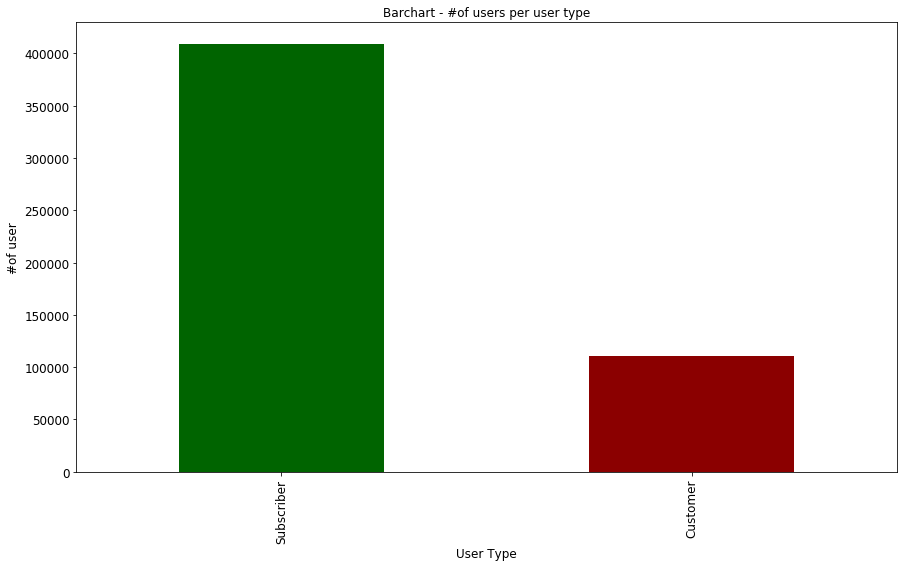

In [20]:
plt.figure()
ax = x.plot.bar(x='user_type', y='#of_users', color=['darkgreen','darkred'], figsize=[14.70, 8.27], fontsize=12)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('#of user', fontsize=12)
plt.title('Barchart - #of users per user type',fontsize=12)
plt.show()

From previous results we can see that we've number of **409230 subscriber** and number of **110470 customer**. Now, we'll look for any missing information for both types


In [21]:
print('Subscriber (Members) information')
print(bike[['subscriber_birth_year','subscriber_gender']][bike['user_type'] == 'Subscriber'].count())
print('')
print('Customer (Casual) information')
print(bike[['subscriber_birth_year','subscriber_gender']][bike['user_type'] == 'Customer'].count())

Subscriber (Members) information
subscriber_birth_year    404424
subscriber_gender        404503
dtype: int64

Customer (Casual) information
subscriber_birth_year    48735
subscriber_gender        48735
dtype: int64


Based on previous statistics, we've **4,806** members without member_birth_year and **4,727** members without member_gender. Also, we've **48,735** customers with member_birth_year and member_gender although it should be filled by members, not customers.
First, I'll drop all members without member_birth_year or member_gender, and all customers with member_birth_year or member_gender

In [22]:
# first, drop subscribers without subscriber_birth_year ot subscriber_gender
bike[(bike['user_type'] == 'Subscriber') & (bike['subscriber_birth_year'].isnull())]


,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,subscriber_birth_year,subscriber_gender
83,638,2017-12-31 22:26:12.030,2017-12-31 22:36:50.917,163,Lake Merritt BART Station,194,Lakeshore Ave at Trestle Glen Rd,3132,Subscriber,NaN,NaN
115,200,2017-12-31 21:53:56.506,2017-12-31 21:57:16.791,147,29th St at Tiffany Ave,134,Valencia St at 24th St,2132,Subscriber,NaN,NaN
330,462,2017-12-31 17:39:45.032,2017-12-31 17:47:27.086,114,Rhode Island St at 17th St,93,4th St at Mission Bay Blvd S,100,Subscriber,NaN,NaN
338,376,2017-12-31 17:38:06.433,2017-12-31 17:44:22.946,296,5th St at Virginia St,311,Paseo De San Antonio at 2nd St,966,Subscriber,NaN,NaN
567,351,2017-12-31 15:43:02.377,2017-12-31 15:48:53.840,93,4th St at Mission Bay Blvd S,114,Rhode Island St at 17th St,100,Subscriber,NaN,NaN
646,686,2017-12-31 15:07:04.168,2017-12-31 15:18:30.453,99,Folsom St at 15th St,321,5th at Folsom,1090,Subscriber,NaN,NaN
686,1933,2017-12-31 14:25:30.111,2017-12-31 14:57:43.872,134,Valencia St at 24th St,99,Folsom St at 15th St,1090,Subscriber,NaN,NaN
903,926,2017-12-31 13:13:52.653,2017-12-31 13:29:19.514,99,Folsom St at 15th St,147,29th St at Tiffany Ave,2599,Subscriber,NaN,NaN
1040,1769,2017-12-31 12:00:58.103,2017-12-31 12:30:28.058,147,29th St at Tiffany Ave,99,Folsom St at 15th St,858,Subscriber,NaN,NaN
1057,390,2017-12-31 12:17:39.085,2017-12-31 12:24:09.635,121,Mission Playground,125,20th St at Bryant St,1501,Subscriber,NaN,NaN


In [23]:
bike[(bike['user_type'] == 'Subscriber') & (bike['subscriber_gender'].isnull())]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,subscriber_birth_year,subscriber_gender
83,638,2017-12-31 22:26:12.030,2017-12-31 22:36:50.917,163,Lake Merritt BART Station,194,Lakeshore Ave at Trestle Glen Rd,3132,Subscriber,NaN,NaN
115,200,2017-12-31 21:53:56.506,2017-12-31 21:57:16.791,147,29th St at Tiffany Ave,134,Valencia St at 24th St,2132,Subscriber,NaN,NaN
330,462,2017-12-31 17:39:45.032,2017-12-31 17:47:27.086,114,Rhode Island St at 17th St,93,4th St at Mission Bay Blvd S,100,Subscriber,NaN,NaN
338,376,2017-12-31 17:38:06.433,2017-12-31 17:44:22.946,296,5th St at Virginia St,311,Paseo De San Antonio at 2nd St,966,Subscriber,NaN,NaN
567,351,2017-12-31 15:43:02.377,2017-12-31 15:48:53.840,93,4th St at Mission Bay Blvd S,114,Rhode Island St at 17th St,100,Subscriber,NaN,NaN
646,686,2017-12-31 15:07:04.168,2017-12-31 15:18:30.453,99,Folsom St at 15th St,321,5th at Folsom,1090,Subscriber,NaN,NaN
686,1933,2017-12-31 14:25:30.111,2017-12-31 14:57:43.872,134,Valencia St at 24th St,99,Folsom St at 15th St,1090,Subscriber,NaN,NaN
903,926,2017-12-31 13:13:52.653,2017-12-31 13:29:19.514,99,Folsom St at 15th St,147,29th St at Tiffany Ave,2599,Subscriber,NaN,NaN
1040,1769,2017-12-31 12:00:58.103,2017-12-31 12:30:28.058,147,29th St at Tiffany Ave,99,Folsom St at 15th St,858,Subscriber,NaN,NaN
1057,390,2017-12-31 12:17:39.085,2017-12-31 12:24:09.635,121,Mission Playground,125,20th St at Bryant St,1501,Subscriber,NaN,NaN


In [24]:
bike = bike.drop(bike[(bike['user_type'] == 'Subscriber') & (bike['subscriber_birth_year'].isnull())].index)
bike = bike.drop(bike[(bike['user_type'] == 'Subscriber') & (bike['subscriber_birth_year'].isnull())].index)

In [25]:
bike = bike.reset_index(drop=True)

In [26]:
# first, drop customers with subscriber_birth_year ot subscriber_gender
bike[(bike['user_type'] == 'Customer') & (bike['subscriber_birth_year'].notnull())]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,subscriber_birth_year,subscriber_gender
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,96,Dolores St at 15th St,88,Customer,1965.0,Female
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,259,Addison St at Fourth St,3539,Customer,1991.0,Female
33,781,2017-12-31 23:33:52.981,2017-12-31 23:46:54.972,251,California St at University Ave,259,Addison St at Fourth St,3539,Customer,1991.0,Female
46,538,2017-12-31 23:24:34.580,2017-12-31 23:33:33.475,85,Church St at Duboce Ave,120,Mission Dolores Park,1780,Customer,1991.0,Male
52,707,2017-12-31 23:14:07.542,2017-12-31 23:25:55.455,245,Downtown Berkeley BART,259,Addison St at Fourth St,2966,Customer,1994.0,Male
96,1133,2017-12-31 22:04:04.769,2017-12-31 22:22:58.355,33,Golden Gate Ave at Hyde St,16,Steuart St at Market St,3644,Customer,1993.0,Female
97,1450,2017-12-31 21:58:35.392,2017-12-31 22:22:45.658,33,Golden Gate Ave at Hyde St,16,Steuart St at Market St,3036,Customer,1987.0,Male
98,224,2017-12-31 22:16:57.797,2017-12-31 22:20:42.357,48,2nd St at S Park St,37,2nd St at Folsom St,3012,Customer,1989.0,Female
99,205,2017-12-31 22:16:59.393,2017-12-31 22:20:25.262,48,2nd St at S Park St,37,2nd St at Folsom St,3376,Customer,1988.0,Male


In [27]:
bike[(bike['user_type'] == 'Customer') & (bike['subscriber_gender'].notnull())]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,subscriber_birth_year,subscriber_gender
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,96,Dolores St at 15th St,88,Customer,1965.0,Female
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,259,Addison St at Fourth St,3539,Customer,1991.0,Female
33,781,2017-12-31 23:33:52.981,2017-12-31 23:46:54.972,251,California St at University Ave,259,Addison St at Fourth St,3539,Customer,1991.0,Female
46,538,2017-12-31 23:24:34.580,2017-12-31 23:33:33.475,85,Church St at Duboce Ave,120,Mission Dolores Park,1780,Customer,1991.0,Male
52,707,2017-12-31 23:14:07.542,2017-12-31 23:25:55.455,245,Downtown Berkeley BART,259,Addison St at Fourth St,2966,Customer,1994.0,Male
96,1133,2017-12-31 22:04:04.769,2017-12-31 22:22:58.355,33,Golden Gate Ave at Hyde St,16,Steuart St at Market St,3644,Customer,1993.0,Female
97,1450,2017-12-31 21:58:35.392,2017-12-31 22:22:45.658,33,Golden Gate Ave at Hyde St,16,Steuart St at Market St,3036,Customer,1987.0,Male
98,224,2017-12-31 22:16:57.797,2017-12-31 22:20:42.357,48,2nd St at S Park St,37,2nd St at Folsom St,3012,Customer,1989.0,Female
99,205,2017-12-31 22:16:59.393,2017-12-31 22:20:25.262,48,2nd St at S Park St,37,2nd St at Folsom St,3376,Customer,1988.0,Male


In [28]:
# drop 
bike = bike.drop(bike[(bike['user_type'] == 'Customer') & (bike['subscriber_birth_year'].notnull())].index)
bike = bike.drop(bike[(bike['user_type'] == 'Customer') & (bike['subscriber_birth_year'].notnull())].index)

In [29]:
bike = bike.reset_index(drop=True)

In [30]:
print('Number of users')
print(bike.user_type.value_counts())

Number of users
Subscriber    404424
Customer       61735
Name: user_type, dtype: int64


In [31]:
bike['age'] = (2017 - (bike['subscriber_birth_year']))

bike

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,subscriber_birth_year,subscriber_gender,age
0,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,245,Downtown Berkeley BART,1094,Customer,NaN,NaN,NaN
1,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,5,Powell St BART Station (Market St at 5th St),2831,Customer,NaN,NaN,NaN
2,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,247,Fulton St at Bancroft Way,3167,Subscriber,1997.0,Female,20.0
3,9226,2017-12-31 22:51:00.918,2018-01-01 01:24:47.166,30,San Francisco Caltrain (Townsend St at 4th St),30,San Francisco Caltrain (Townsend St at 4th St),1487,Customer,NaN,NaN,NaN
4,4334,2017-12-31 23:46:37.196,2018-01-01 00:58:51.211,284,Yerba Buena Center for the Arts (Howard St at ...,284,Yerba Buena Center for the Arts (Howard St at ...,1503,Customer,NaN,NaN,NaN
5,4150,2017-12-31 23:37:07.548,2018-01-01 00:46:18.308,20,Mechanics Monument Plaza (Market St at Bush St),20,Mechanics Monument Plaza (Market St at Bush St),3125,Customer,NaN,NaN,NaN
6,4238,2017-12-31 23:35:38.145,2018-01-01 00:46:17.053,20,Mechanics Monument Plaza (Market St at Bush St),20,Mechanics Monument Plaza (Market St at Bush St),2543,Customer,NaN,NaN,NaN
7,3292,2017-12-31 23:46:32.403,2018-01-01 00:41:24.605,284,Yerba Buena Center for the Arts (Howard St at ...,22,Howard St at Beale St,3058,Customer,NaN,NaN,NaN
8,3177,2017-12-31 23:48:11.757,2018-01-01 00:41:09.581,284,Yerba Buena Center for the Arts (Howard St at ...,22,Howard St at Beale St,3197,Customer,NaN,NaN,NaN
9,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,24,Spear St at Folsom St,2311,Subscriber,1990.0,Male,27.0


In [32]:
bike['hour'] = bike["start_time"].dt.hour
bike['month'] = bike["start_time"].dt.month

In [33]:
bike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,subscriber_birth_year,subscriber_gender,age,hour,month
0,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,245,Downtown Berkeley BART,1094,Customer,NaN,NaN,NaN,22,12
1,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,5,Powell St BART Station (Market St at 5th St),2831,Customer,NaN,NaN,NaN,17,12


In [34]:
bike['age'].describe()

count    404424.000000
mean         36.981962
std          10.558249
min          18.000000
25%          29.000000
50%          35.000000
75%          43.000000
max         117.000000
Name: age, dtype: float64

The oldest user is 117 years old. I'll drop any user older than 90 years old.

In [35]:
bike = bike.drop(bike[(bike['age'] > 90)].index)
bike['age'].describe()

count    404007.000000
mean         36.904474
std          10.280867
min          18.000000
25%          29.000000
50%          35.000000
75%          43.000000
max          89.000000
Name: age, dtype: float64

I'll check if any trip has end_time prior to start_time

In [36]:
bike[(bike['end_time'] < bike['start_time'])]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,subscriber_birth_year,subscriber_gender,age,hour,month
151222,292,2017-11-05 01:59:52.216,2017-11-05 01:04:45.180,121,Mission Playground,119,18th St at Noe St,2773,Subscriber,1994.0,Male,23.0,1,11


In [37]:
bike = bike.drop(bike[(bike['end_time'] < bike['start_time'])].index)

In [38]:
bike[(bike['end_time'] < bike['start_time'])]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,subscriber_birth_year,subscriber_gender,age,hour,month


In [39]:
# Since enteries aren't sorted by start_time, I'll sort it first
bike = bike.sort_values(by=['start_time'])
bike = bike.reset_index(drop=True)

In [40]:
# to simplify the duration_sec, I'll convert it from seconds to minutes.
bike.insert(loc=1, column='duration_min', value= bike['duration_sec'] / 60)

In [41]:
bike.head(2)

,duration_sec,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,subscriber_birth_year,subscriber_gender,age,hour,month
0,424,7.066667,2017-06-28 09:47:36.347,2017-06-28 09:54:41.187,21,Montgomery St BART Station (Market St at 2nd St),48,2nd St at S Park St,240,Subscriber,1985.0,Female,32.0,9,6
1,366,6.100000,2017-06-28 09:47:41.664,2017-06-28 09:53:47.715,58,Market St at 10th St,59,S Van Ness Ave at Market St,669,Subscriber,1981.0,Male,36.0,9,6


In [42]:
bike.insert(loc=3, column='start_date', value= bike['start_time'].dt.date)

bike['start_date'] = pd.to_datetime(bike['start_date'])

In [43]:
# descriptive statistics for numeric variables
print(bike.describe())

        duration_sec   duration_min  start_station_id  end_station_id  \
count  465741.000000  465741.000000     465741.000000   465741.000000   
mean     1020.952602      17.015877         94.379005       91.391761   
std      3172.373917      52.872899         86.062848       84.687919   
min        61.000000       1.016667          3.000000        3.000000   
25%       370.000000       6.166667         24.000000       22.000000   
50%       572.000000       9.533333         67.000000       66.000000   
75%       887.000000      14.783333        137.000000      134.000000   
max     86369.000000    1439.483333        340.000000      340.000000   

             bike_id  subscriber_birth_year            age           hour  \
count  465741.000000          404006.000000  404006.000000  465741.000000   
mean     1674.048821            1980.095491      36.904509      13.422890   
std       972.215996              10.280857      10.280857       4.645255   
min        10.000000            19

In [44]:
bike.shape

(465741, 16)

In [45]:
bike.dtypes

duration_sec                      int64
duration_min                    float64
start_time               datetime64[ns]
start_date               datetime64[ns]
end_time                 datetime64[ns]
start_station_id                  int64
start_station_name               object
end_station_id                    int64
end_station_name                 object
bike_id                           int64
user_type                        object
subscriber_birth_year           float64
subscriber_gender                object
age                             float64
hour                              int64
month                             int64
dtype: object

In [46]:
bike.head(3)

,duration_sec,duration_min,start_time,start_date,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,subscriber_birth_year,subscriber_gender,age,hour,month
0,424,7.066667,2017-06-28 09:47:36.347,2017-06-28,2017-06-28 09:54:41.187,21,Montgomery St BART Station (Market St at 2nd St),48,2nd St at S Park St,240,Subscriber,1985.0,Female,32.0,9,6
1,366,6.100000,2017-06-28 09:47:41.664,2017-06-28,2017-06-28 09:53:47.715,58,Market St at 10th St,59,S Van Ness Ave at Market St,669,Subscriber,1981.0,Male,36.0,9,6
2,188,3.133333,2017-06-28 09:49:46.377,2017-06-28,2017-06-28 09:52:55.338,25,Howard St at 2nd St,48,2nd St at S Park St,117,Subscriber,1984.0,Male,33.0,9,6


### What is the structure of your dataset?

There are 466,159 trip in the dataset with 12 features ('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'bike_id', 'user_type', 'subscriber_birth_year', 'subscriber_gender', 'age'). All variables are numeric in nature, except the variables user_type are ordered factor variables with the following levels.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the duration_min of the trips in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that subscriber_gender and age will have the strongest effect on each trip's duration: the younger the subscriber, the longer the duration. 

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: duration_sec.

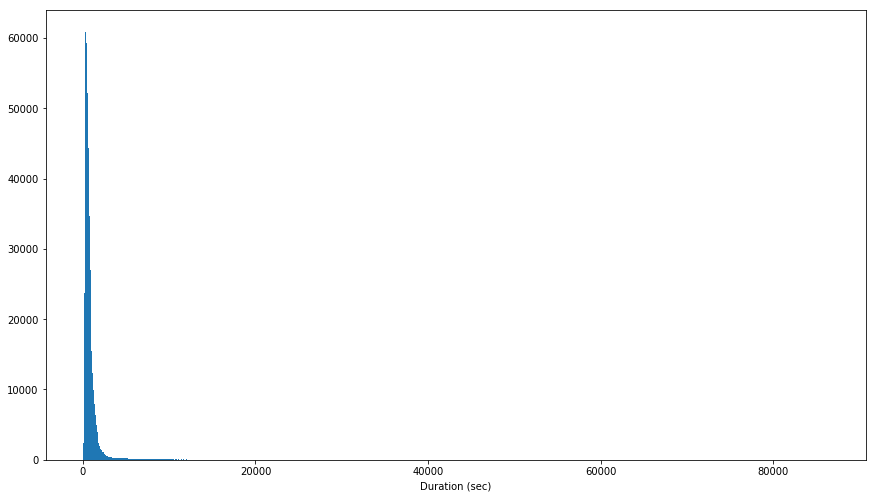

In [47]:
# start with a standard-scaled plot
binsize = 100
bins = np.arange(0, bike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[14.70, 8.27])
plt.hist(data = bike, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (sec)')
plt.show()

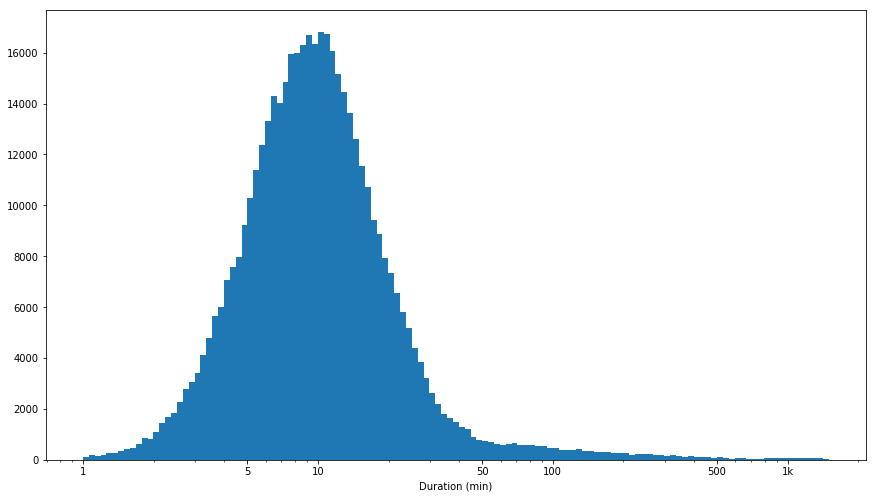

In [48]:
# there's a long tail in the distribution, I'll use duration in minutes on a log scale instead.
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(bike['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[14.70, 8.27])
plt.hist(data = bike, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 5, 10, 50, 100, 500, 1000], [1, 5, 10, 50, 100, 500, '1k'])
plt.xlabel('Duration (min)')
plt.show()

duration(seconds) has a long-tailed distribution, with a lot of trips on the short duration end, and few on the long duration trips. When duration(in seconds) converted into duration(minutes) and plotted on a log-scale, the duration distribution looks like a curve, with one peak at 10 min. 

Next up, the first predictor variable of interest: date.

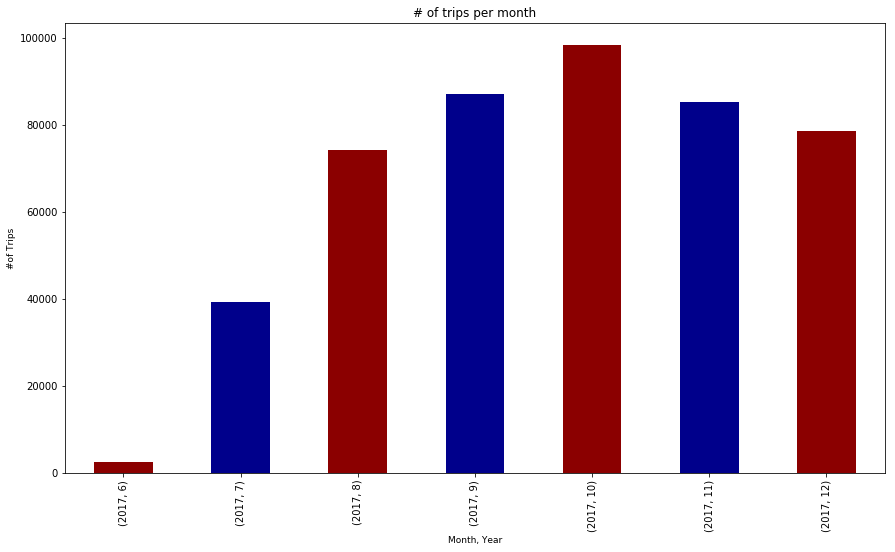

In [49]:
# plot the relation between number of trips and the month
plt.figure(figsize=[14.70, 8.27])
bike.groupby([bike["start_date"].dt.year, bike["start_date"].dt.month])["start_date"].count().plot.bar(color=['darkred','darkblue'])
plt.xlabel('Month, Year', fontsize=9)
plt.ylabel('#of Trips', fontsize=9)
plt.title('# of trips per month',fontsize=12)
plt.show();

October has the most number of trips. even though July has the least number of trip because the data started from 28th of July. So, July can be ignored. 

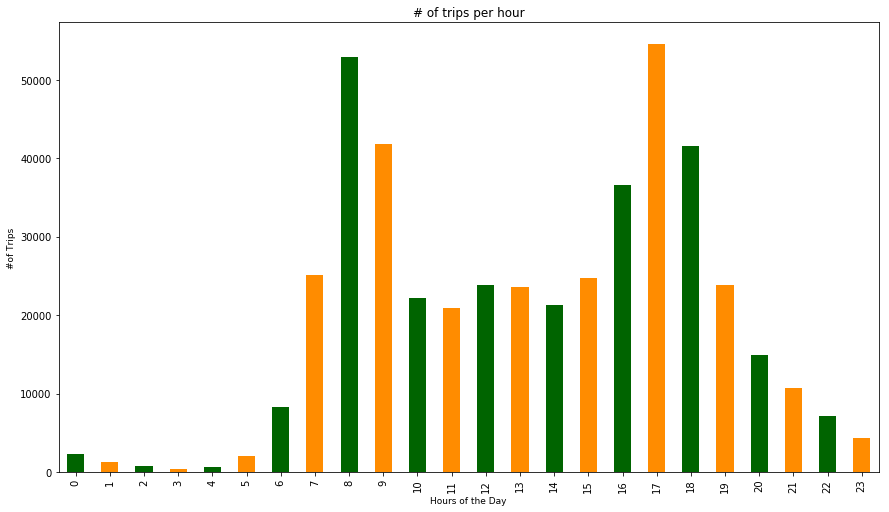

In [50]:
# plot the relation between number of trips and the start hour
plt.figure(figsize=[14.70, 8.27])
bike.groupby([bike["start_time"].dt.hour])["start_time"].count().plot.bar(color=['darkgreen','darkorange'])
plt.xlabel('Hours of the Day', fontsize=9)
plt.ylabel('#of Trips', fontsize=9)
plt.title('# of trips per hour',fontsize=12)
plt.show();

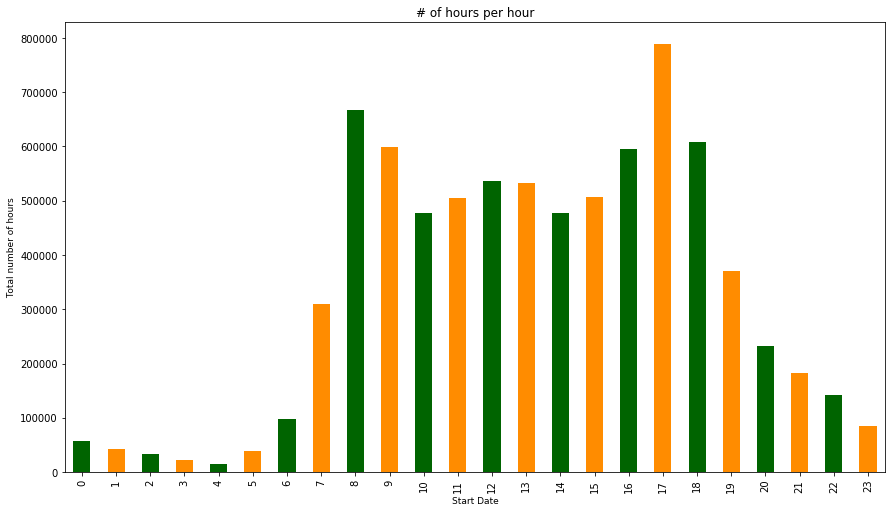

In [51]:
# plot the relation between number of hours and the start hour
plt.figure(figsize=[14.70, 8.27])
bike.groupby([bike["start_time"].dt.hour])["duration_min"].sum().plot.bar(color=['darkgreen','darkorange'])
plt.xlabel('Start Date', fontsize=9)
plt.ylabel('Total number of hours', fontsize=9)
plt.title('# of hours per hour',fontsize=12)
plt.show();

The start and end of working-hours have the most number of trips and # of hours, most companies working-hours starts at 8 and end at 17.

In [52]:
#convert days of the year to weekdays
bike['Day_of_Week'] = pd.to_datetime(bike['start_time'], format='%m/%d/%y').dt.weekday_name

#convert Day_of_Week into ordered categorical types.
ordinal_var_dict = {'Day_of_Week': ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike[var] = bike[var].astype(ordered_var)


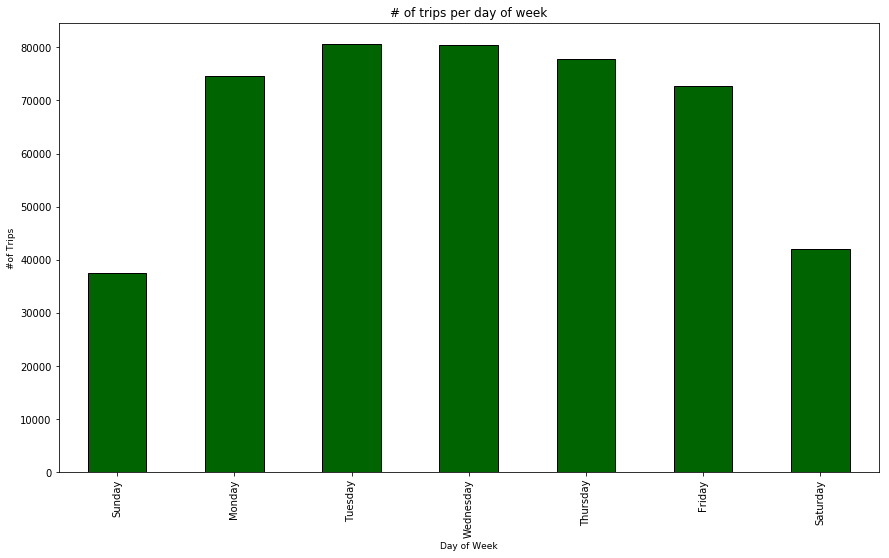

In [53]:
# plot the relation between number of trips and the day of the week
plt.figure(figsize=[14.70, 8.27])
bike.groupby(['Day_of_Week'])['Day_of_Week'].count().plot.bar(color=['darkgreen'], edgecolor= 'black', )
plt.xlabel('Day of Week', fontsize=9)
plt.ylabel('#of Trips', fontsize=9)
plt.title('# of trips per day of week',fontsize=12)
plt.show();

From previous chart, we can see that workweek days has an affects on using bikes. Weekend days has half the number of the trips comparing to workweek trips.

Next up, the first predictor variable of interest: user_type.

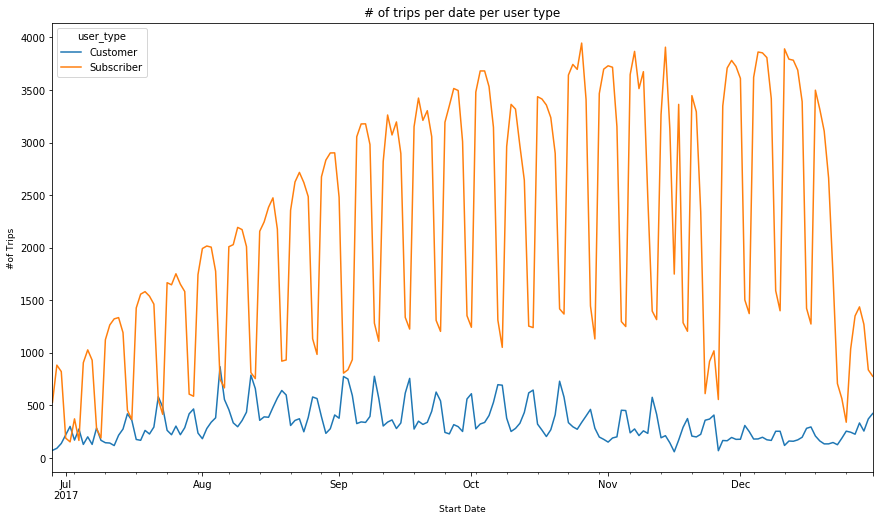

In [54]:
# plotting user_type 
fig, ax = plt.subplots(figsize=[14.70, 8.27])
# use unstack()
bike.groupby(['start_date', 'user_type'])['user_type'].count().unstack().plot(ax=ax)
plt.xlabel('Start Date', fontsize=9)
plt.ylabel('#of Trips', fontsize=9)
plt.title('# of trips per date per user type',fontsize=12)
plt.show();

We can see clearly that user type has a huge affect on number of trips

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The trip's duration (sec) variable took on a large range of values, so I converted it to duration (min) then looked at the data using a log transform. Under the transformation, the data looked curve, with one peak at 10 minutes, and most of trips range between 3 and 40 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the subscriber_birth_year, subscriber_gender variables, a number of mistakenly filled or missing values were identified. For safety, all of these points were removed from the dataset to move forwards.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [55]:
numeric_vars = ['duration_sec', 'age', 'hour', 'month']
categoric_vars = ['Day_of_Week', 'subscriber_gender', 'user_type']

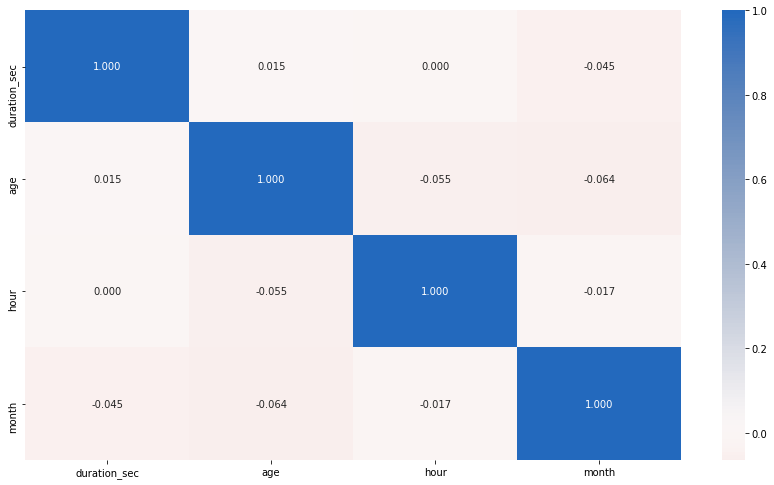

In [56]:
# correlation plot
plt.figure(figsize=[14.70, 8.27])
sb.heatmap(bike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

C:\Users\ecekm\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\ecekm\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ecekm\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 1058.4x595.44 with 0 Axes>

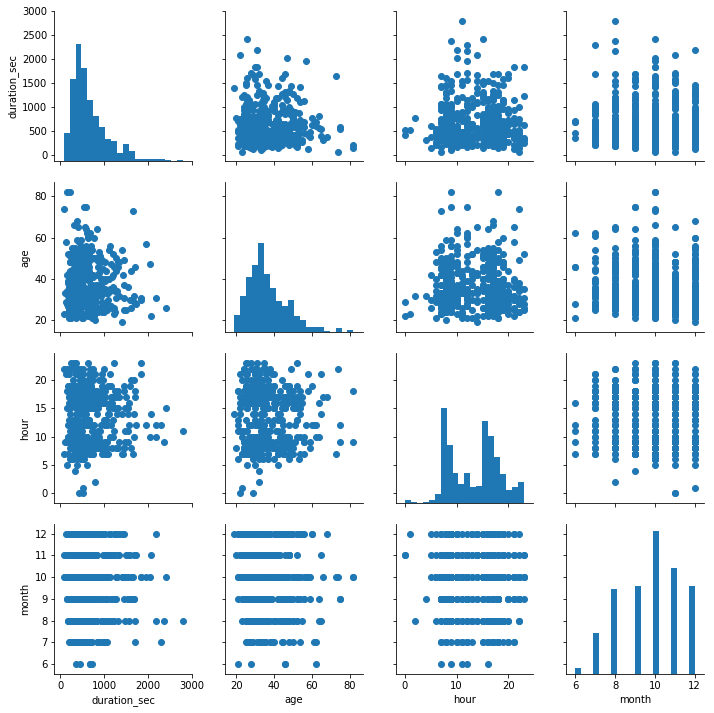

In [57]:
# plot matrix: sample 500 trips so that plots are clearer and
# they render faster
bike_s = bike[bike['duration_min'] <50]
samples = np.random.choice(bike_s.shape[0], 500, replace = False)
bike_samp = bike_s.loc[samples,:]
plt.figure(figsize=[14.70, 8.27])

g = sb.PairGrid(data = bike_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

As unexpected, the 'duration_sec', 'age', 'start_station_id', 'end_station_id', 'hour', 'month' dimensions are all highly uncorrelated with one another, but 'duration_sec', 'age', 'hour', 'month' are highly correlated with number of trips. 

Let's move on to looking at how duration_min and number of trips correlate with the categorical variables.

<Figure size 1058.4x595.44 with 0 Axes>

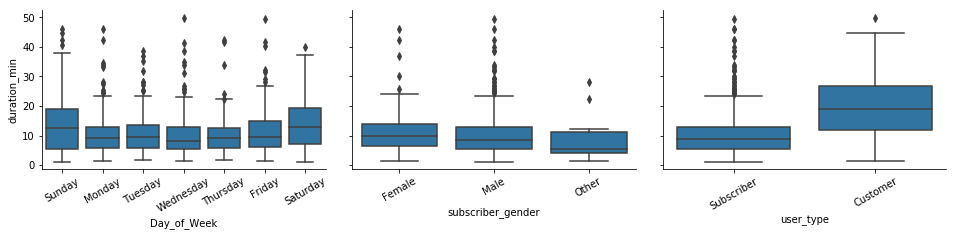

In [73]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(bike_s.shape[0], 1000, replace = False)
bike_samp = bike_s.loc[samples,:]


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    ax = sb.boxplot(x, y, color = default_color)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

plt.figure(figsize=[14.70, 8.27])
g = sb.PairGrid(data = bike_samp, y_vars = 'duration_min', x_vars = categoric_vars,
                height = 3, aspect = 1.5)

g.map(boxgrid)

plt.show();



Interestingly, it appears that there are no relationships between the categorical variables and the duration. The user with the user_type (Customer) seem to get the longest average trips. 

Finally, let's look at relationships between the three categorical features.

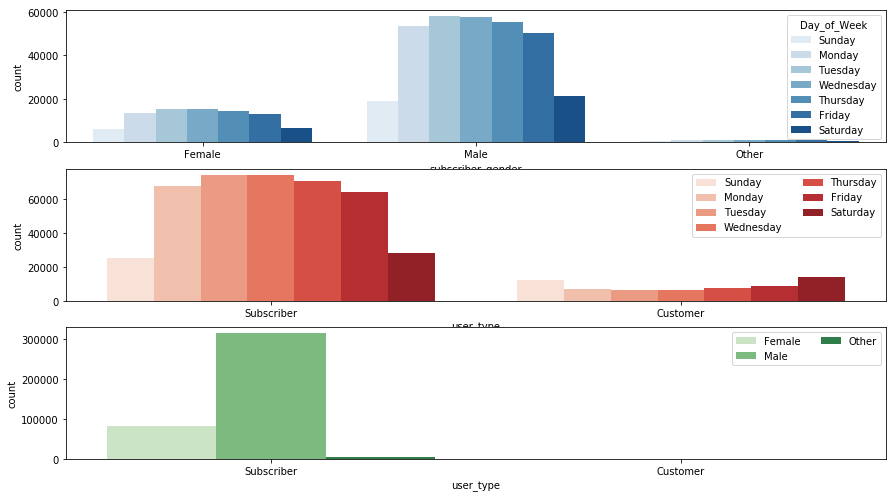

In [59]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize=[14.70, 8.27])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = bike, x = 'subscriber_gender', hue = 'Day_of_Week', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bike, x = 'user_type', hue = 'Day_of_Week', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = bike, x = 'user_type', hue = 'subscriber_gender', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

There doesn't seem to be that much interaction between subscriber gender and number of trips per weekday. But for the user_type , it seems that there is an interaction between number of trips per weekday and the user_type. For 'subscriber' type, Sunday and Thursday have the lowest number of trips. While on the other side, 'Customer' have the opposite where Sunday and Thursday have the highest number of trips

With the preliminary look at bivariate relationships out of the way, I want to dig into some of the relationships more. First, I want to see how duration_min and age are related to one another for all of the data, and to plot price on a log scale.

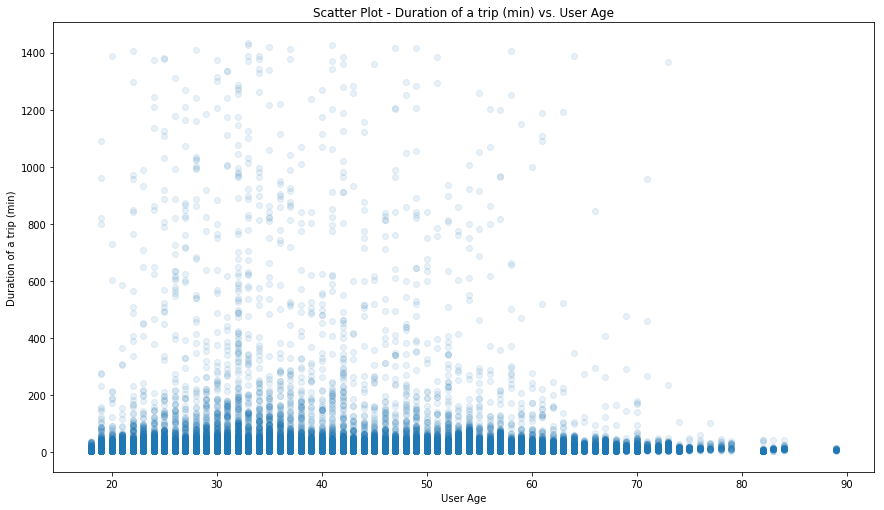

In [60]:
# scatter plot of duration_min vs. age, with log transform on duration_min axis
plt.figure(figsize=[14.70, 8.27])
plt.scatter(data = bike, x = 'age', y = 'duration_min', alpha = 1/10)
plt.title("Scatter Plot - Duration of a trip (min) vs. User Age")
plt.xlabel('User Age')
plt.ylabel('Duration of a trip (min)')
plt.show()


This plot suggests from the concavity that There is no relation between age and duration of the trip. Even though, the plot suggests that trip with duration > 100 min peaks at the age of 32 and decrease until it dispear before the age of 80.

Now, let's take a second look at the duration_min and age distributions on the three categorical variables: Day_of_Week, subscriber_gender, and user_type.

In [61]:
# compute the logarithm of duration_min to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

bike['log_duration_min'] = bike['duration_min'].apply(log_trans)

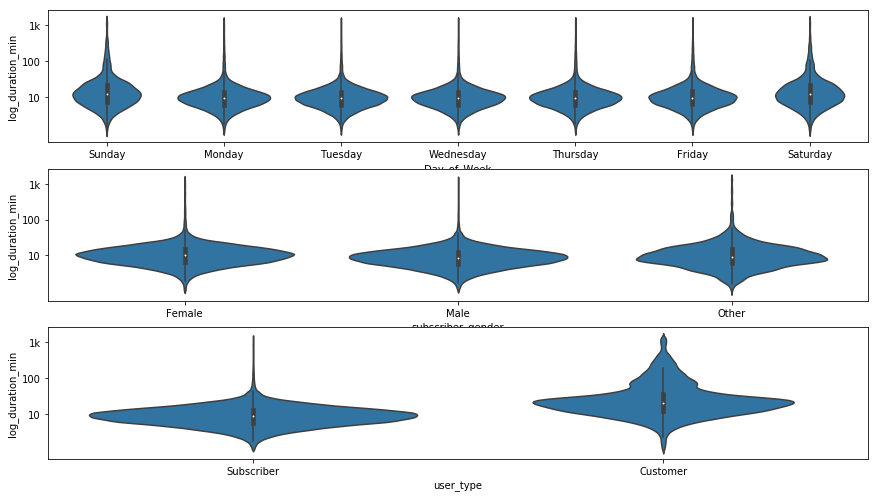

In [62]:
# plot the categorical variables against duration_min again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 1, nrows = 3 , figsize=[14.70, 8.27])
default_color = sb.color_palette()[0]

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = bike, x = var, y = 'log_duration_min', ax = ax[i],
               color = default_color)
    ax[i].set_yticks(log_trans(np.array([10, 100, 1000])))
    ax[i].set_yticklabels([10, 100, '1k'])


plt.show()

The plot of the full data using a violin plot and variable transformations reveals much more than the earlier box plots. It is  suggested that the three categorical variables: Day_of_Week, subscriber_gender, and user_type have no effect on duration_min distributions. It will be interesting to see how the categories map in the multivariate analysis.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the three categorical measures play into the relationship on duration.

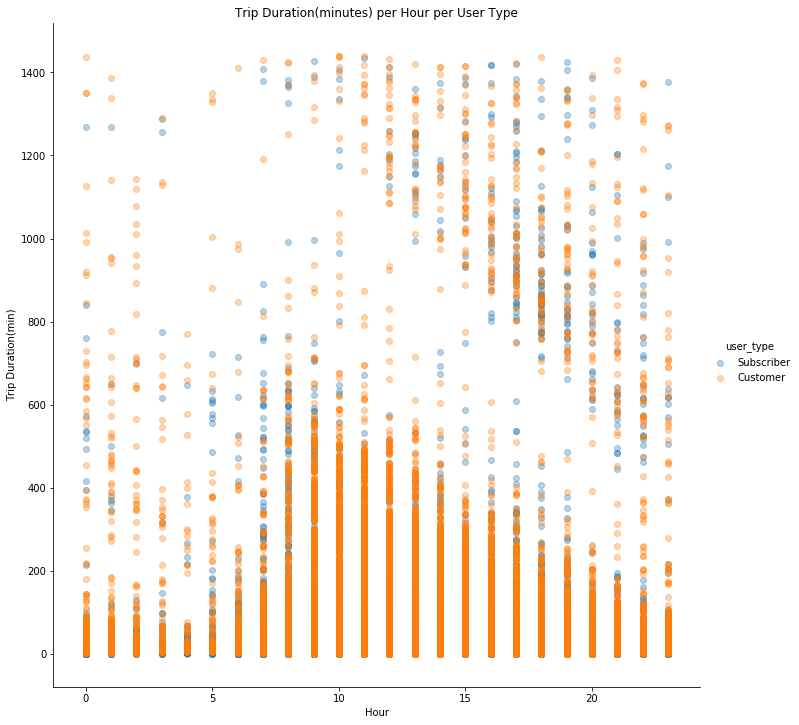

In [63]:
# create faceted heat maps on levels of the user_type variable per hour
f = sb.FacetGrid(data =  bike, hue = 'user_type', height = 10)
f.map(plt.scatter, 'hour', 'duration_min', alpha = 1/3)
f.add_legend()
plt.title('Trip Duration(minutes) per Hour per User Type')
plt.xlabel('Hour')
plt.ylabel('Trip Duration(min)');


Because the previous scatter chart points are orgnized along vertical lines, and because of the density of those point are not clear, I'll use seaborn's method stripplot() instead of scatter().

Text(0, 0.5, 'Trip Duration (min)')

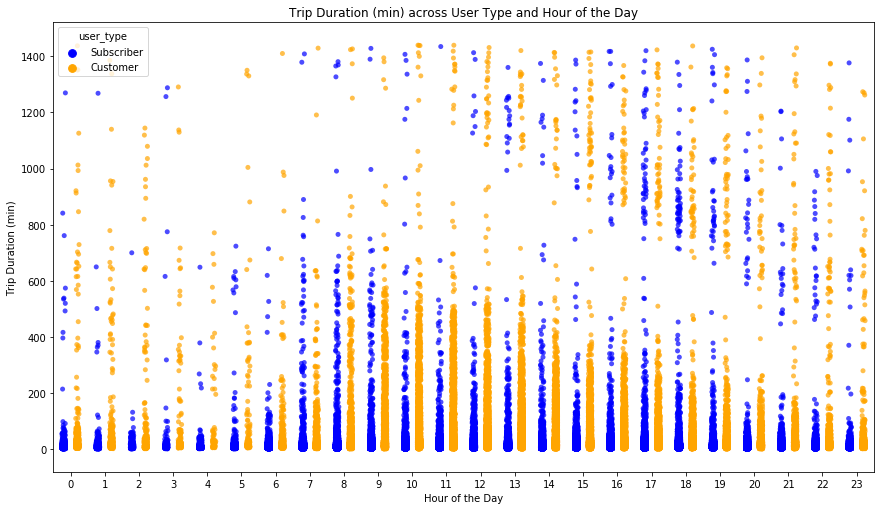

In [64]:
fig, ax = plt.subplots(figsize=[14.70, 8.27])
sb.stripplot(data = bike, x='hour', y = 'duration_min', hue = 'user_type', 
              jitter = True, dodge = True, alpha = 0.7, 
              palette = ['blue','orange','red'])
plt.title("Trip Duration (min) across User Type and Hour of the Day")
plt.xlabel('Hour of the Day')
plt.ylabel('Trip Duration (min)')

Text(0, 0.5, 'Trip Duration (min)')

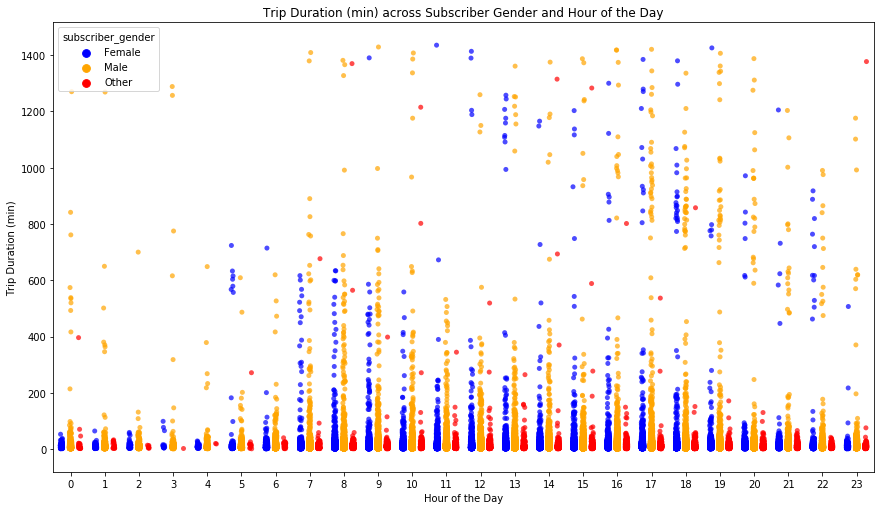

In [65]:
# create faceted heat maps on levels of the subscriber_gender variable per hour
fig, ax = plt.subplots(figsize=[14.70, 8.27])
sb.stripplot(data = bike, x='hour', y = 'duration_min', hue = 'subscriber_gender', 
              jitter = True, dodge = True, alpha = 0.7, 
              palette = ['blue','orange','red'])
plt.title("Trip Duration (min) across Subscriber Gender and Hour of the Day")
plt.xlabel('Hour of the Day')
plt.ylabel('Trip Duration (min)')

Text(0, 0.5, 'Trip Duration (min)')

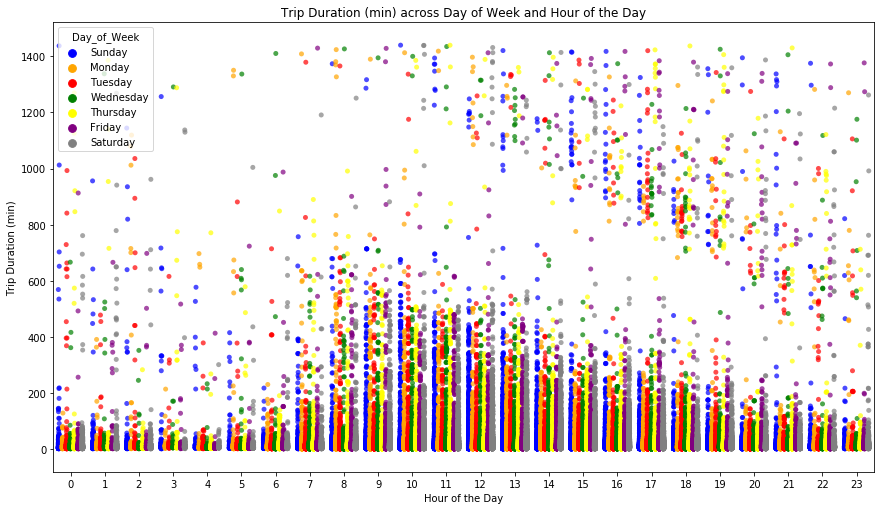

In [66]:
# create faceted heat maps on levels of the Day_of_Week variable per month
fig, ax = plt.subplots(figsize=[14.70, 8.27])
sb.stripplot(data = bike, x='hour', y = 'duration_min', hue = 'Day_of_Week', 
              jitter = True, dodge = True, alpha = 0.7, 
              palette = ['blue','orange','red','green','yellow','purple','grey'])
plt.title("Trip Duration (min) across Day of Week and Hour of the Day")
plt.xlabel('Hour of the Day')
plt.ylabel('Trip Duration (min)')

Text(0, 0.5, 'Trip Duration (min)')

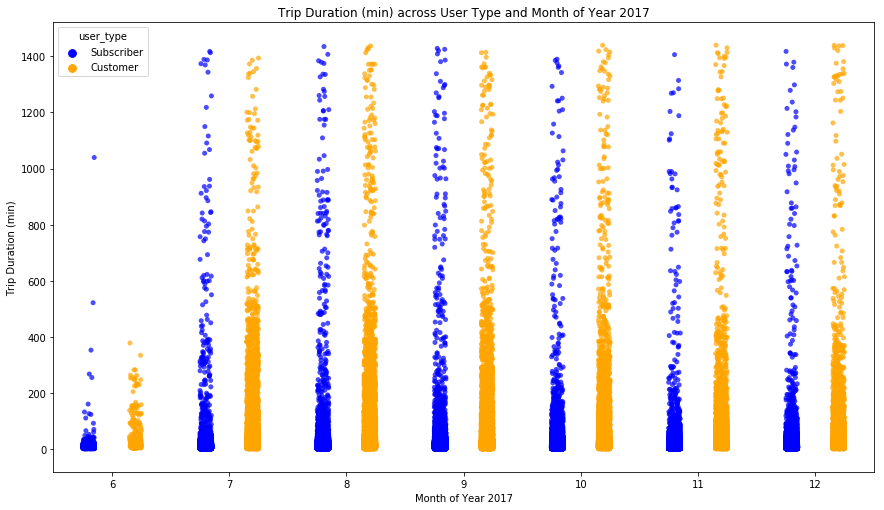

In [67]:
# create faceted heat maps on levels of the user_type variable per month

fig, ax = plt.subplots(figsize=[14.70, 8.27])
sb.stripplot(data = bike, x='month', y = 'duration_min', hue = 'user_type', 
              jitter = True, dodge = True, alpha = 0.7, 
              palette = ['blue','orange','red'])
plt.title("Trip Duration (min) across User Type and Month of Year 2017")
plt.xlabel('Month of Year 2017')
plt.ylabel('Trip Duration (min)')

Text(0, 0.5, 'Trip Duration (min)')

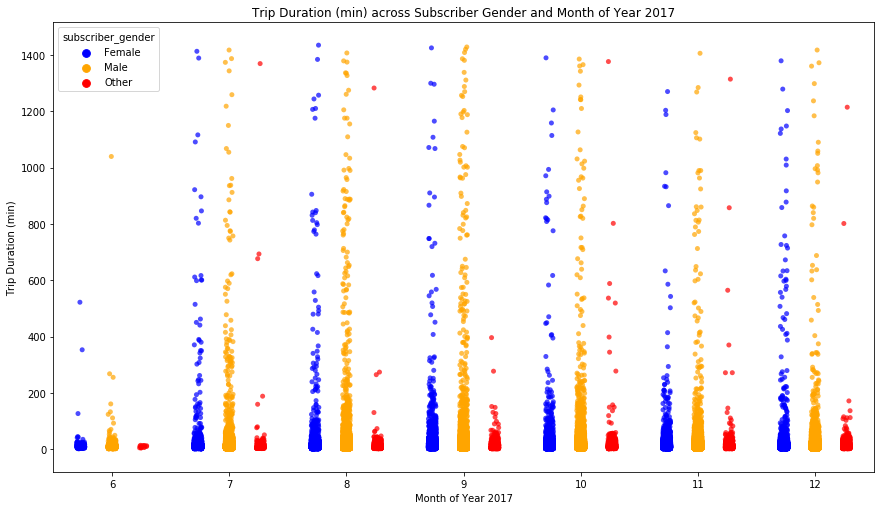

In [68]:
# create faceted heat maps on levels of the subscriber_gender variable per month

fig, ax = plt.subplots(figsize=[14.70, 8.27])
sb.stripplot(data = bike, x='month', y = 'duration_min', hue = 'subscriber_gender', 
              jitter = True, dodge = True, alpha = 0.7, 
              palette = ['blue','orange','red'])
plt.title("Trip Duration (min) across Subscriber Gender and Month of Year 2017")
plt.xlabel('Month of Year 2017')
plt.ylabel('Trip Duration (min)')

Text(0, 0.5, 'Trip Duration (min)')

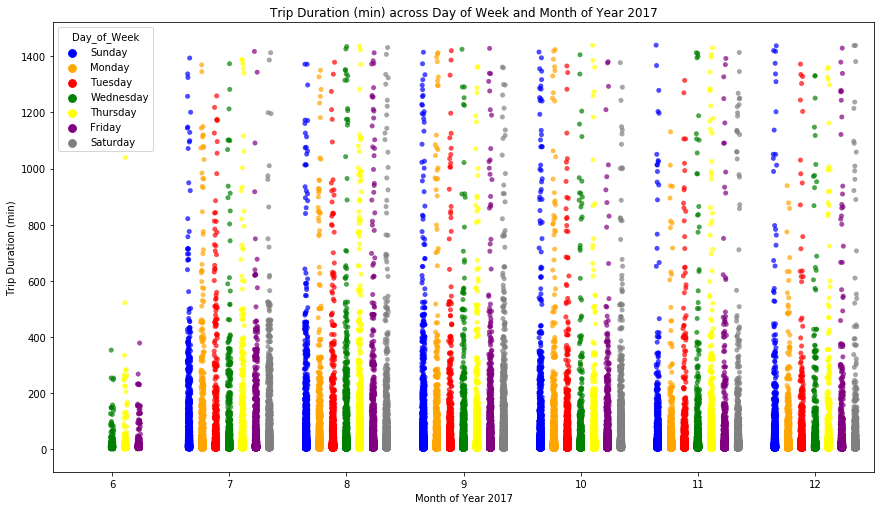

In [69]:
# create faceted heat maps on levels of the Day_of_Week variable per month
fig, ax = plt.subplots(figsize=[14.70, 8.27])
sb.stripplot(data = bike, x='month', y = 'duration_min', hue = 'Day_of_Week', 
              jitter = True, dodge = True, alpha = 0.7, 
              palette = ['blue','orange','red','green','yellow','purple','grey'])
plt.title("Trip Duration (min) across Day of Week and Month of Year 2017")
plt.xlabel('Month of Year 2017')
plt.ylabel('Trip Duration (min)')

In each of the faceted heat maps, you can see the there are no relationship of user_type, subscriber_gender, Day_of_Week against duration_min, 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of duration_min by looking at the impact of the three categorical Day_of_Week, User_type and Subscriber_gender features. The multivariate exploration here showed that there indeed is no effect on bike duration, but in the dataset, there are many missing varibles that might effects duration or number of trips such as weather or distance.


In [70]:
#Storing Manipulated Dataset with deleting un-needed columns to read the data such as hour and month
exported_df = bike.to_csv(r'bike.csv', index = None, header=True)